In [1]:
!nvidia-smi

Tue Apr 15 10:51:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 2.&nbsp;Upload Image Dataset and Prepare Training Data

## 2.1 Upload images

First, we need to upload the dataset to Colab. Here are a few options for moving the `data.zip` folder into this Colab instance.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp "/content/drive/MyDrive/ObjectBehindTheGlass.v3i.yolov11.zip" "/content/"


At this point, whether you used Option 1, 2, or 3, you should be able to click the folder icon on the left and see your `data.zip` file in the list of files. Next, we'll unzip `data.zip` and create some folders to hold the images. Run the following code block to unzip the data.

In [8]:
# Unzip images to a custom data folder
!unzip -q /content/ObjectBehindTheGlass.v3i.yolov11.zip -d /content/custom_data

# 3.&nbsp;Install Requirements (Ultralytics)

Next, we'll install the Ultralytics library in this Google Colab instance. This Python library will be used to train the YOLO model.

In [10]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# 4.&nbsp;Configure Training


In [22]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/custom_data/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/custom_data/data.yaml

Created config file at /content/custom_data/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 10
names:
- AirPod
- Apple
- CardHolder
- Key
- Mobile
- Mouse
- Orange
- Stapler
- StickyNote
- Watch


# 5.&nbsp;Train Model

## 5.2 Run Training!

Run the following code block to begin training. If you want to use a different model, number of epochs, or resolution, change `model`, `epochs`, or `imgsz`.

In [24]:
!yolo detect train data=/content/custom_data/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/custom_data/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

In [25]:
!find runs/detect/ -name best.pt


runs/detect/train4/weights/best.pt
runs/detect/train3/weights/best.pt
runs/detect/train6/weights/best.pt


#6.&nbsp;Test Model

In [26]:
!yolo detect predict model=runs/detect/train6/weights/best.pt source=custom_data/valid/images save=True

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs

image 1/45 /content/custom_data/valid/images/rgb_frame_0021_png.rf.36e464ed4e9ff738b206c7429f1d4be6.jpg: 480x640 1 AirPod, 1 Apple, 1 CardHolder, 1 Key, 1 Mobile, 1 Mouse, 1 Orange, 1 Stapler, 1 StickyNote, 1 Watch, 48.9ms
image 2/45 /content/custom_data/valid/images/rgb_frame_0021_png.rf.4f85d6294cd51806140eb03adef0b515.jpg: 480x640 1 AirPod, 1 Apple, 1 CardHolder, 1 Key, 1 Mobile, 1 Mouse, 1 Orange, 1 Stapler, 1 StickyNote, 1 Watch, 12.5ms
image 3/45 /content/custom_data/valid/images/rgb_frame_0022_png.rf.1d28b5387c269f1fc7c45c3229e7f67b.jpg: 480x640 1 AirPod, 1 Apple, 1 CardHolder, 1 Key, 1 Mobile, 1 Mouse, 1 Orange, 1 Stapler, 1 StickyNote, 1 Watch, 12.4ms
image 4/45 /content/custom_data/valid/images/rgb_frame_0022_png.rf.64895960676e51ec383afa1683a52f59.jpg: 480x640 1 AirPod, 1 Apple, 1 CardHolder, 1 Key, 1 Mobile, 

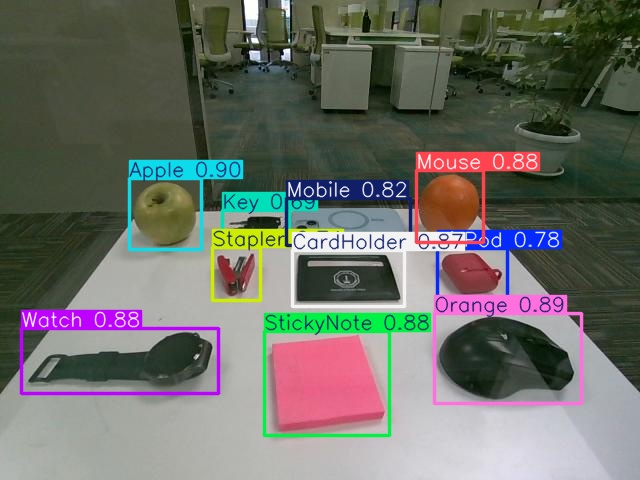

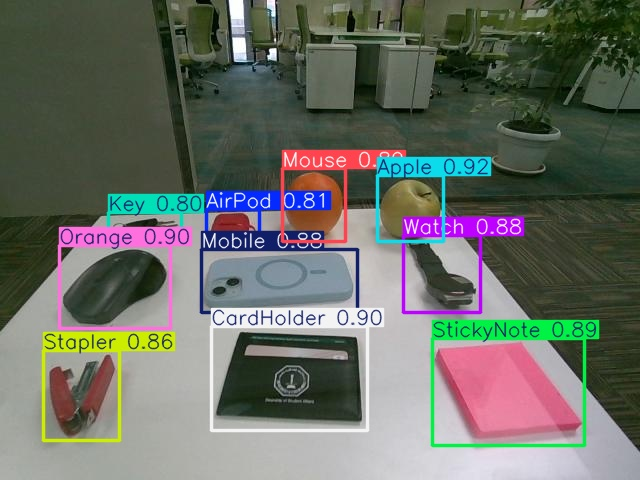

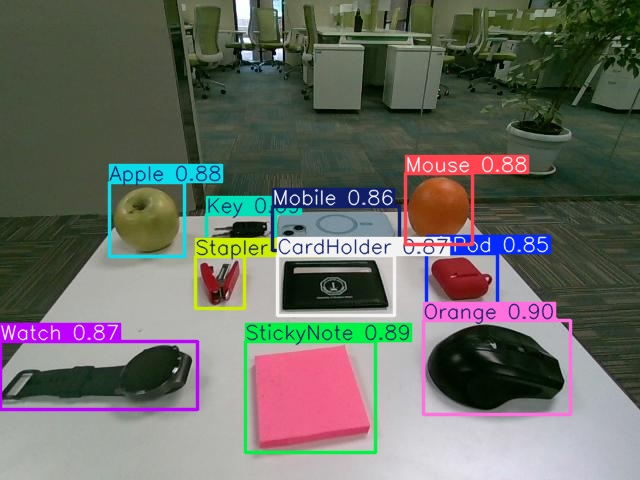

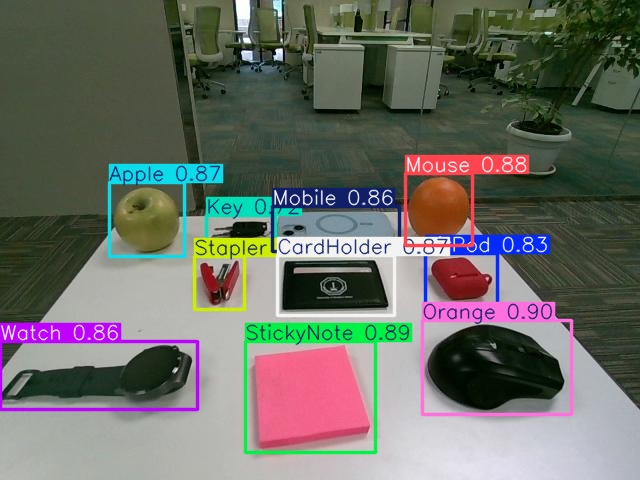

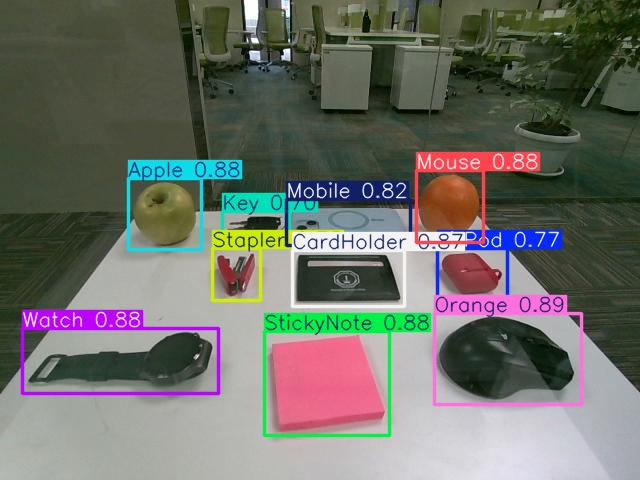

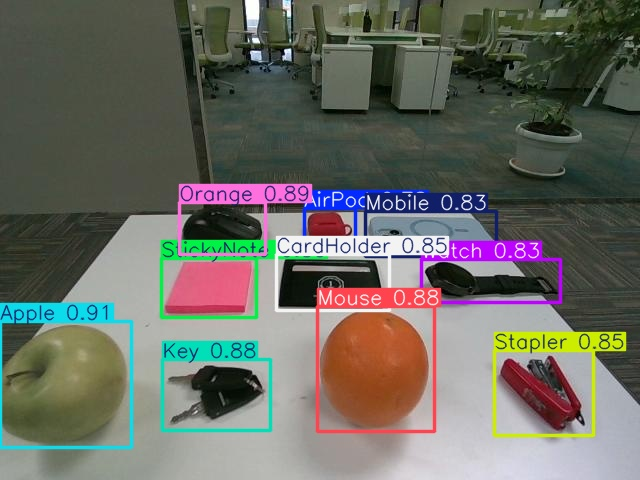

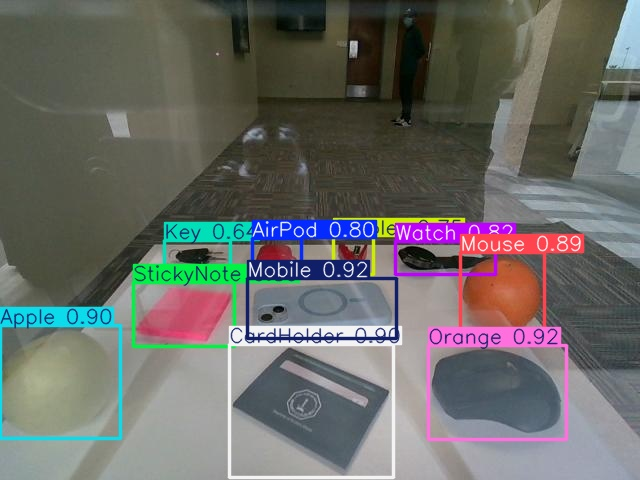

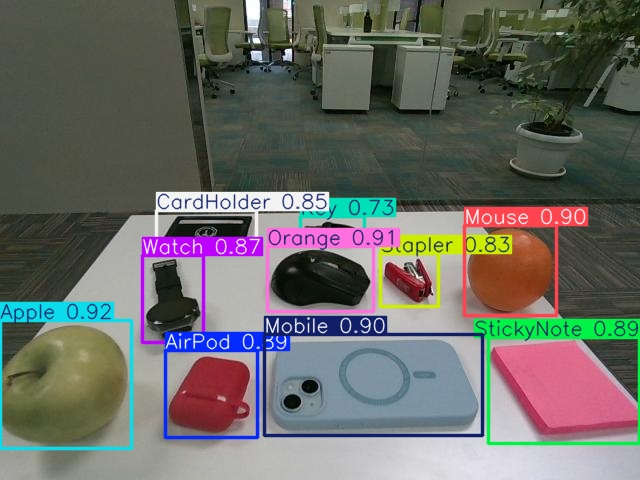

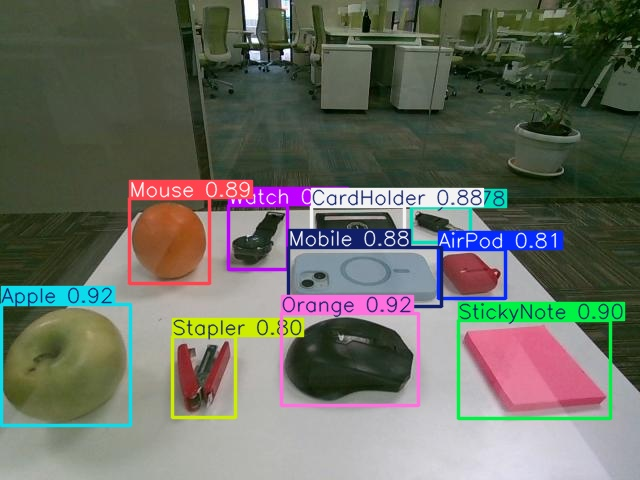

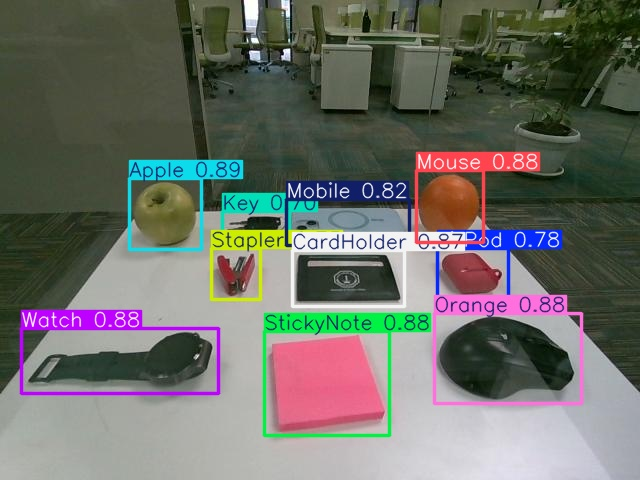

In [27]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


#Save model

In [32]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/assignment_3_model_yolo11s
!cp /content/runs/detect/train6/weights/best.pt /content/assignment_3_model_yolo11s/assignment_3_model_yolo11s.pt
!cp -r /content/runs/detect/train /content/assignment_3_model_yolo11s

# Zip into "assignment_3_model_yolo11.zip"
%cd assignment_3_model_yolo11s
!zip /content/assignment_3_model_yolo11s.zip assignment_3_model_yolo11s.pt
!zip -r /content/assignment_3_model_yolo11s.zip train
%cd /content

/content/assignment_3_model_yolo11s
  adding: assignment_3_model_yolo11s.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/weights/ (stored 0%)
  adding: train/args.yaml (deflated 53%)
/content


In [34]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/assignment_3_model_yolo11s.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>